# Part II - Ford GoBike Presentation
## by Walaa Zakarnah

## Investigation Overview

The primary goal of this presentation is to analyze Ford GoBike usage patterns by examining user types, trip durations, and the times at which trips occur. By understanding these interactions, we can gain insights into user behavior that can inform service improvements and targeted marketing strategies.


## Dataset Overview and Executive Summary

The dataset used in this analysis includes information on trips taken with the Ford GoBike system. Key variables include the trip start hour, trip duration, and user type (Customer or Subscriber).

### Key Insights:

1. **User Type and Trip Duration**: Customers tend to have longer and more varied trip durations compared to subscribers, who mostly use the service for shorter, consistent durations.

2. **Peak Usage Hours**: The distribution of trip durations across different hours shows that customers exhibit more varied trip patterns throughout the day, while subscribers have more predictable usage, likely due to commuting habits.

3. **Service Optimization**: Understanding these patterns can help in optimizing bike availability and maintenance schedules, as well as in designing targeted marketing campaigns for different user groups.


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
bikes=pd.read_csv('cleaned_bikes.csv')

In [3]:
bikes.head(1)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_hour
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,17


## Visualization 1: Distribution of Trip Durations by User Type

__Observation:__ This bar chart shows the distribution of trip durations across user types. The chart reveals that customers have a wider range of trip durations, while subscribers' trips are mostly shorter. This suggests that subscribers primarily use the service for regular commuting, while customers might use it for leisure or irregular trips.

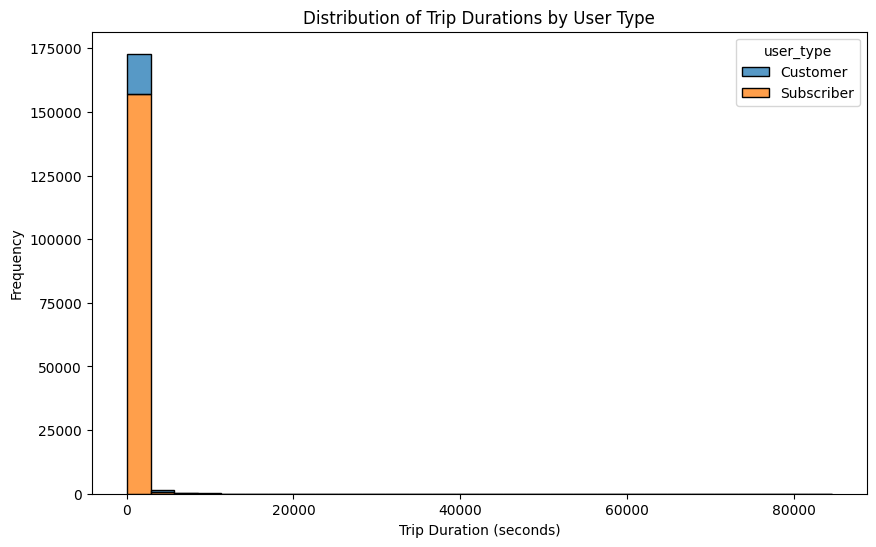

In [4]:
plt.figure(figsize=(10, 6))
sns.histplot(data=bikes, x='duration_sec', hue='user_type', multiple='stack', bins=30)
plt.title('Distribution of Trip Durations by User Type')
plt.xlabel('Trip Duration (seconds)')
plt.ylabel('Frequency')
plt.show()

## Visualization 2: Peak Usage Hours by User Type
__Observation:__ This line chart highlights the peak hours of usage for customers and subscribers. The data shows that subscribers have consistent peak usage in the early morning and late afternoon, aligning with typical commuting hours. In contrast, customers have more varied usage patterns throughout the day.

In [5]:
bikes.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip',
       'start_hour'],
      dtype='object')

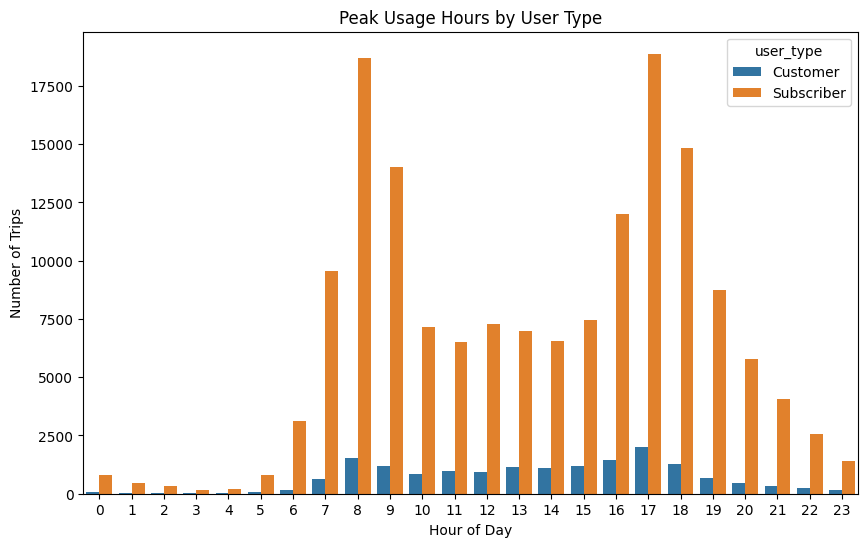

In [6]:
plt.figure(figsize=(10, 6))
sns.countplot(data=bikes, x='start_hour', hue='user_type')
plt.title('Peak Usage Hours by User Type')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips')
plt.show()

## Visualization 3: Trip Duration and Start Hour Interaction
__Observation:__ This heatmap shows the interaction between trip duration and start hour for each user type. The chart illustrates that customers tend to have longer trips spread across different hours, while subscribers have shorter trips concentrated during specific hours, reflecting their commuting habits.

In [7]:
bikes['start_time'] = pd.to_datetime(bikes['start_time'])
bikes['end_time'] = pd.to_datetime(bikes['end_time'])

bikes['start_hour'] = bikes['start_time'].dt.hour

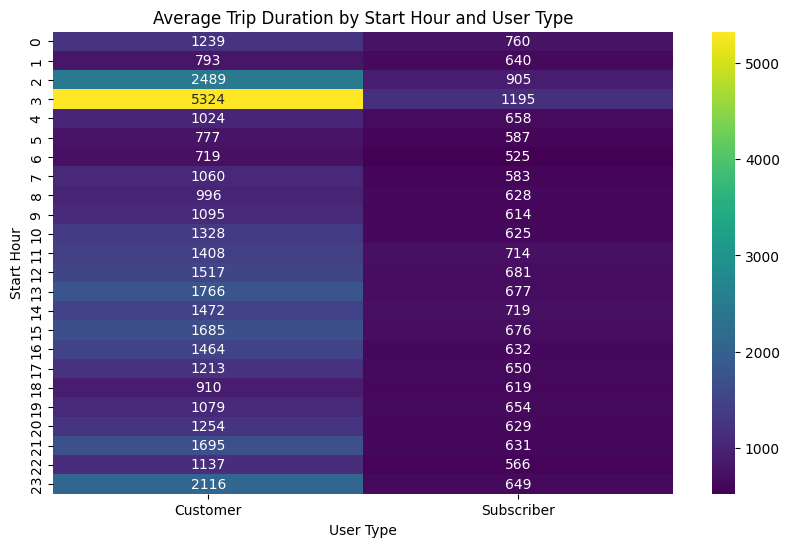

In [8]:
pivot_table = bikes.pivot_table(values='duration_sec', index='start_hour', columns='user_type', aggfunc='mean')

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, cmap='viridis', annot=True, fmt='.0f')
plt.title('Average Trip Duration by Start Hour and User Type')
plt.xlabel('User Type')
plt.ylabel('Start Hour')
plt.show()